<a href="https://colab.research.google.com/github/GabrielYamaya/Data-Warehouse-e-Data-Lake-Teste/blob/main/Data_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teste

In [1]:
import pandas as pd
import numpy as np
import os

# Cria uma pasta chamada "data_lake" no diretório caso ela não exista ainda
if not os.path.exists('data_lake'):
  os.makedirs('data_lake')

# Cria uma variável para o número de arquivos com o valor 10
num_files = 10
# Cria uma variável para o número de linhas de cada aquivo com o valor 1000
num_rows_per_file = 1000

# Cria uma lista para armazenar os Data Frames e os nomes dos arquivos
dfs = []

# Faz um loop para gerar arquivos de acordo com a variável definida anteriormente, neste caso 10
for i in range(num_files):
  # Gera valroes aleatórios para cada arquivo
  data = {
      'coluna1': np.random.randint(0, 100, num_rows_per_file),
      'coluna2': np.random.randn(num_rows_per_file),
      'coluna3': np.random.choice(['A','B','C'], num_rows_per_file)
  }

  # Cria um Data Frame a partir dos dados aleatórios gerados
  df = pd.DataFrame(data)

  # Define o nome dos arquivos numericamente a partir do 1
  file_name = f'data_lake/dados_{i+1}.csv'

  # Salva e converte o Data Frame para um arquivo .csv
  df.to_csv(file_name, index=False)

  # Adiciona na lista o nome do arquivo e o Data Frame
  dfs.append((file_name, df))

# Mensagem de sucesso para os dados criados
print("Dados do Data Lake gerados com sucesso!")

# Loop para imprimir todos os nomes de arquivos com seus cabeçalhos
for file_name, df in dfs:
  print(f"\nDados do arquivo: {file_name}\n")
  print(df.head())

Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       58 -0.257711       B
1       86  0.982209       A
2       80 -0.567978       C
3       73  1.767612       C
4       38 -0.876834       A

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       33  0.073776       C
1       64 -0.895116       A
2       24  0.477706       C
3       63  0.183097       A
4       25 -1.953707       B

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0       82  0.179473       C
1       75 -1.260499       A
2       45 -0.435321       A
3       97 -1.163934       C
4       65 -1.713341       C

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       12 -0.021200       A
1       78 -0.278927       C
2       60 -1.326590       A
3       75  0.095289       A
4       18  0.927161       A

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       30 -1.297128     

Atividade

Primeiras linhas do Data Frame:
   coluna1   coluna2 coluna3
0       58 -0.257711       B
1       86  0.982209       A
2       80 -0.567978       C
3       73  1.767612       C
4       38 -0.876834       A

Informações sobre o Data Frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

 Resumo estatístico do Data Frame:
          coluna1      coluna2
count  1000.00000  1000.000000
mean     50.39900    -0.012378
std      28.38005     1.001627
min       0.00000    -3.100995
25%      26.75000    -0.684991
50%      50.00000     0.000522
75%      76.00000     0.670688
max      99.00000     2.970248


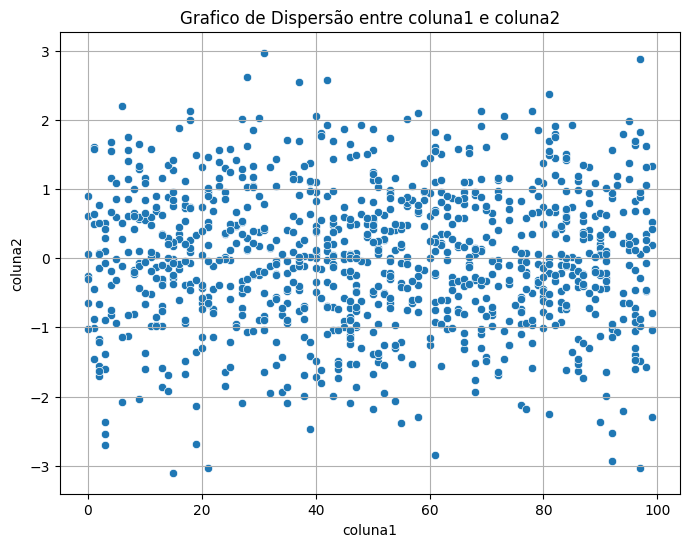

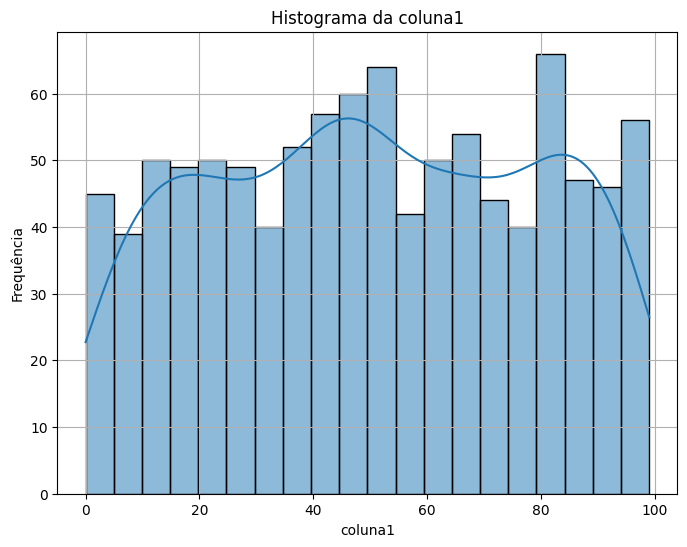

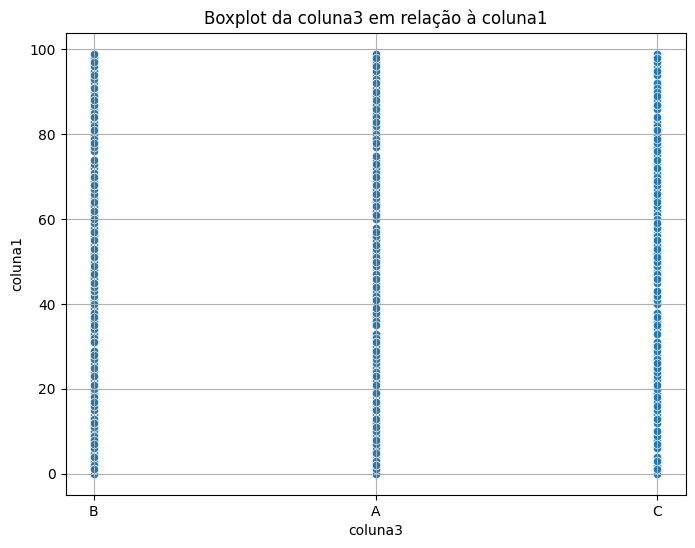

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Cria uma String com o link do Banco de Dados
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

# Faz a leitura da tabela "dados_1" salvando em um Data Frame
table_name = 'data_lake/dados_1.csv'
df = pd.read_csv(table_name)

# Printa o cabeçalho da Data Frame
print("Primeiras linhas do Data Frame:")
print(df.head())

# Printa as informações do Data Frame
print("\nInformações sobre o Data Frame:")
print(df.info())

# Printa um resumo estatístico do DataFrame
print("\n Resumo estatístico do Data Frame:")
print(df.describe())

# Cria e printa o gráfico de dispersão entre as colunas "coluna1" e "coluna2".
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Grafico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Cria e printa o histograma da coluna 'coluna1'.
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='coluna1', bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Cria e printa o boxplot da coluna 'coluna3' em relação à coluna 'coluna1'.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação à coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()